LINK COLLAB: https://colab.research.google.com/drive/150m_CNj0oNMWn0ULLH6zUCj5sHLfQadz#scrollTo=SwficvdnR1yq

### Modificaciones principales

Uso de "is_liquid", para usar solo los activos líquidos:  




In [ ]:
#Función get_features()
liq = data.sel(field="is_liquid").ffill("time").bfill("time").fillna(0)

# Expand liquidity to match dimensions of result
liq_expanded = liq.expand_dims(field=result.field)  # Match the "field" dimension

# Apply liquidity filter (assets with liq == 0 will be excluded)
result = result.where(liq_expanded > 0.5, drop=True)


Características añadidas:
  
- TRIX: Este indicador captura tanto la tendencia a largo plazo como los cambios en la dirección de dicha tendencia, eliminando el ruido del mercado. Ayuda a identificar cambios en el impulso y evita reacciones a movimientos insignificantes.

- ATR: Proporciona una medida clara de la volatilidad. Los activos con alta volatilidad pueden presentar mayores oportunidades o riesgos, y el ATR ayuda a identificar estas situaciones.

- OBV: Utiliza el volumen de transacciones para medir la presión acumulativa de compra o venta. Un aumento en el OBV junto con un alza en los precios puede indicar acumulación, mientras que las divergencias entre el OBV y el precio pueden ser señales de una posible reversión.

In [ ]:
#get_features()

# new feature: Trix (TRIX)
trix = qnta.trix(data.sel(field="close"), 15)  # Using a period of 15 (can be adjusted)

# new feature: Average True Range (ATR)
atr = qnta.atr(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"), 14).expand_dims(field=["atr"])

# new feature: On-Balance Volume (OBV)
obv = qnta.obv(data.sel(field="close"), data.sel(field="vol")).expand_dims(field=["obv"])

Los mercados financieros presentan numerosos patrones no lineales y complejos. Algoritmos como Gradient Boosting y sus variantes, como Histogram Gradient Boosting, pueden identificar interacciones complejas entre variables sin necesidad de especificarlas explícitamente, lo que los hace ideales para estos problemas.

El modelo utilizado es Histogram Gradient Boosting, una versión de Gradient Boosting diseñada para ser más eficiente en términos de velocidad y uso de memoria al trabajar con grandes conjuntos de datos. scikit-learn recomienda su uso en lugar de Gradient Boosting para conjuntos de datos superiores a 10,000 muestras.


In [ ]:
 #Función get_model()
 model = HistGradientBoostingClassifier()

Gráfica y Sharpe Ratio

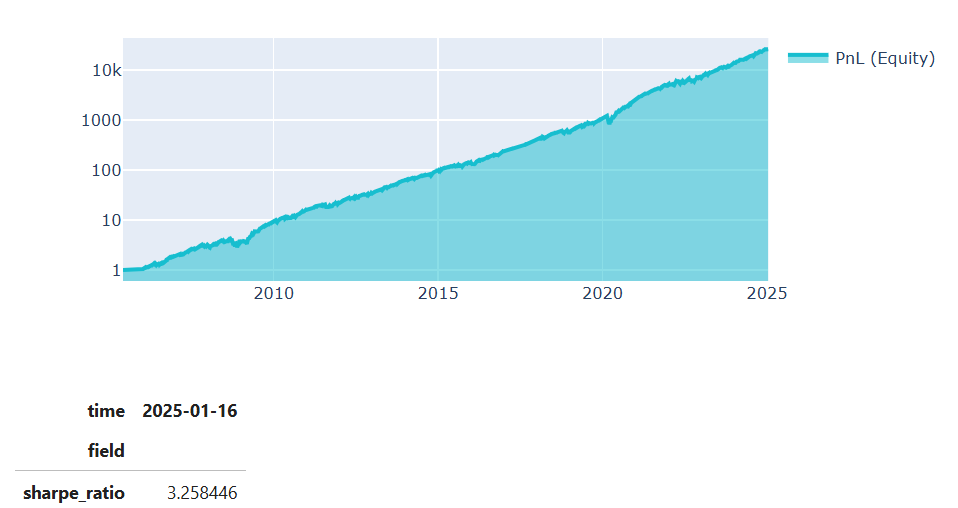![image.png](
  
)